In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$\quad 
\frac{dy}{dx} + y = x, \quad \quad y(0) = 1.
$$
This has a closed-form solution
$$\quad
y = x - 1 + 2e^{-x}
$$

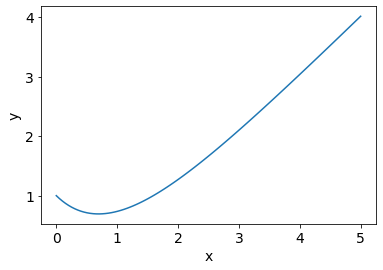

In [4]:
from scipy.integrate import odeint

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys)

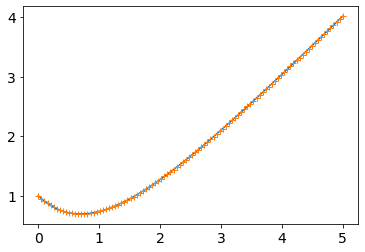

In [75]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+")

# Euler method

$$\frac{dy}{dx}=x-y$$


$y_{n+1} = y_n + hf(x_n,y_n)$

$y_0=0+hf(t_n,y_n)$

$y_1=y_0+hf(x_n,y_n)$

$y_2=y_1+hf(x_n,y_n)$

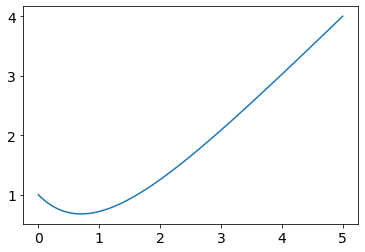

In [125]:
t=100
h=5/t
x = np.linspace(0,5,t)
y = np.zeros(t)

y[0]=1
temp=h*(x[0]-y[0])

for i in range(1,t):
    y[i]=temp+y[i-1]
    temp=h*(x[i]-y[i])
    
plt.plot(x, y)

$$\frac{dy}{dt}=t-y$$

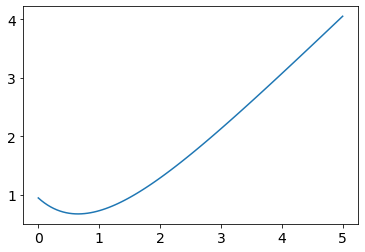

In [176]:
P=1
a=100
h=5/a
t = np.linspace(0,5,a)
y = []

for i in range(a):
    P+=h*(t[i]-P)
    y.append(P)
    
plt.plot(t, y)

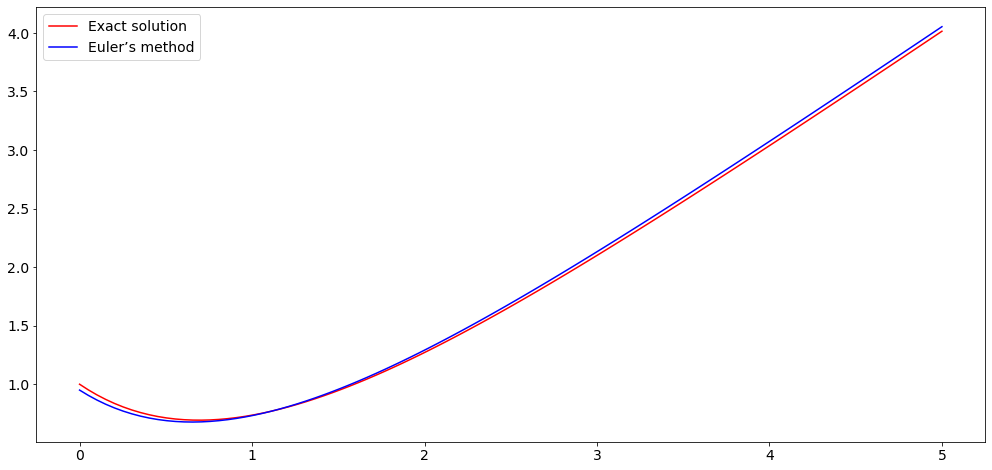

In [167]:
xe=np.linspace(0,5,100)
ye=[]

for i in range(len(xe)):
    ye.append(xe[i] - 1 + 2*np.exp(-xe[i]))

plt.subplots(figsize=(17,8))
plt.plot(xe, ye, color='red', label="Exact solution")
plt.plot(t, y, color='blue', label="Euler’s method")
plt.legend()

$$\frac{dy}{dx}=y-x$$

Euler’s Method - $y_n= y_{n-1} + h(y_{n-1} − x_{n-1})$

Modified Euler Method (Heun’s Method) - $y_n= y_{n-1} + \frac{h}{2}(y_{n-1} − x_{n-1}+(y_{n-1} + h(y_{n-1} − x_{n-1})-x_{n})))$

Runge-Kutta Method - $y_n=y_{n-1}+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$

$k_1=h(y_{n-1} − x_{n-1})$

$k_2=h((y_{n-1}+\frac{1}{2}k_1)-(x_{n-1}+\frac{1}{2}h))$

$k_3=h((y_{n-1}+\frac{1}{2}k_2)-(x_{n-1}+\frac{1}{2}h))$

$k_4=h(y_{n-1} +k_3- x_n)$

[0.5        0.67563936 0.64085909 0.25915546]
[0.5    0.75   0.875  0.8125]
[0.5        0.6875     0.6796875  0.35449219]
[0.5        0.67578125 0.6413269  0.26031232]


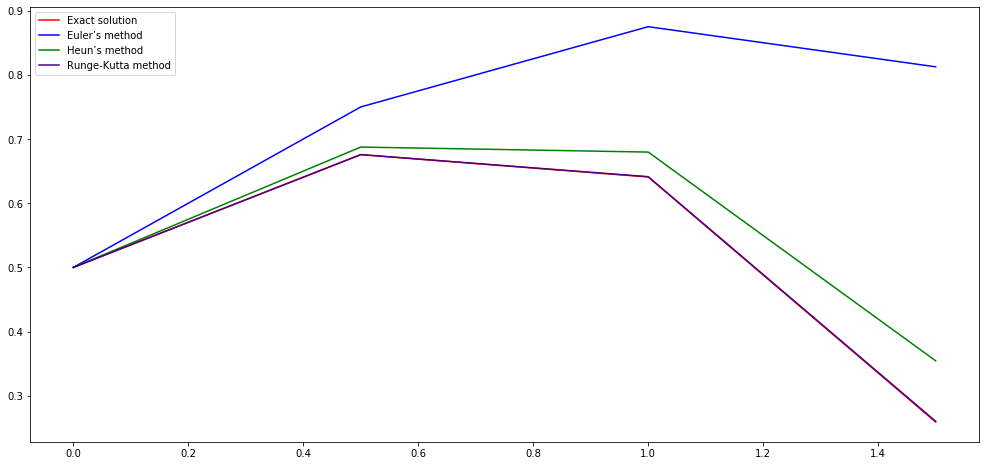

In [95]:
h=0.5
# x = np.linspace(0,1,t)
x = np.arange(0, 2, h)
# x=[]
# for i in range(101):
#     x.append(i/100)
ye = np.zeros(len(x))
ye[0]=0.5

yeu = np.zeros(len(x))
yeu[0]=0.5

ypeu = np.zeros(len(x))
ypeu[0]=0.5

yrk = np.zeros(len(x))
yrk[0]=0.5

for i in range(1,len(x)):
#     x[i-1]=format(x[i-1], '.2f')
    ye[i]=0.5*(2*x[i]-np.exp(x[i])+2)

    yeu[i]=yeu[i-1]+h*(yeu[i-1]-x[i-1])

    ypeu[i]=ypeu[i-1]+h/2*(ypeu[i-1]-x[i-1]+(ypeu[i-1]+h*(ypeu[i-1]-x[i-1]))-x[i])
    
    k1=h*(yrk[i-1]-x[i-1])
    k2=h*(yrk[i-1]+0.5*k1-x[i-1]-0.5*h)
    k3=h*(yrk[i-1]+0.5*k2-x[i-1]-0.5*h)
    k4=h*(yrk[i-1]+k3-x[i])
    yrk[i]=yrk[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
    

plt.subplots(figsize=(17,8))
plt.plot(x, ye, color='red', label="Exact solution")
plt.plot(x, yeu, color='blue', label="Euler’s method")
plt.plot(x, ypeu, color='green', label="Heun’s method")
plt.plot(x, yrk, color='indigo', label="Runge-Kutta method")
plt.legend()
# print(x)
print(ye)
print(yeu)
print(ypeu)
print(yrk)
# print(0.5*(2*x[2]-exp(x[2])+2))

# print(y[2-1]+h*(y[2-1]-x[2-1]))

# print(y[2-1]+h/2*(y[2-1]-x[2-1]+(y[2-1]+h*(y[2-1]-x[2-1]))-x[2]))

# k1=h*(y[2-1]-x[2-1])
# k2=h*(y[2-1]+0.5*k1-x[2-1]-0.5*h)
# k3=h*(y[2-1]+0.5*k2-x[2-1]-0.5*h)
# k4=h*(y[2-1]+k3-x[2])
# print(y[2-1]+(1/6)*(k1+2*k2+2*k3+k4))

# Verhulst equation of population growth

$$\frac{dP}{dt}=r P \left(1 - \frac{P}{K}\right)$$

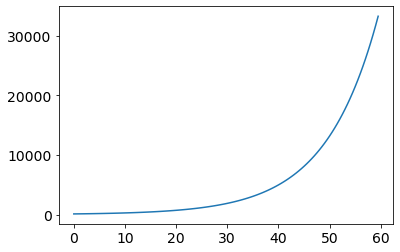

In [320]:
P=100
r=0.1
K=500

h=0.5
t = np.arange(0, 60, h)
y=[]
y.append(P)

for i in range(1,120):
    P+=h*(P*r)
#     P+=h*(P*r*(1-P/K))
    y.append(P)
    
plt.plot(t, y)
# print(x)
# print(y)

# Lotka–Volterra equations
$$\\
\begin{align}
 \frac{dx}{dt} &= \alpha x - \beta x y \\\\
 \frac{dy}{dt} &= \delta x y - \gamma y
\end{align}
$$

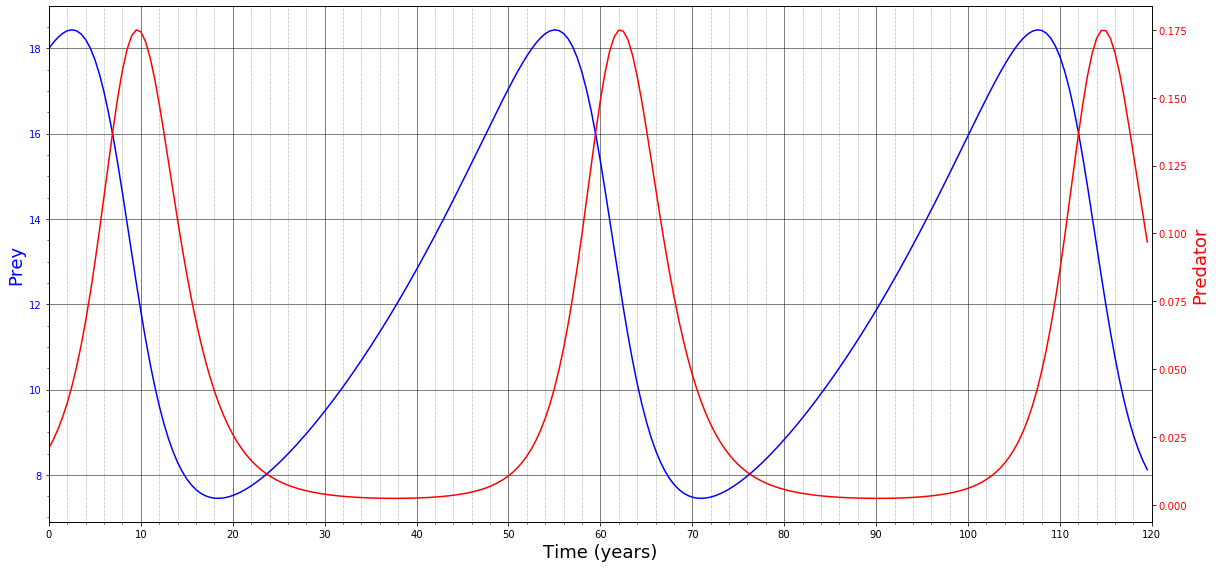

In [171]:
E=18
P=0.021

a=0.0325
b=0.8
c=-0.6
d=-0.05

h=0.5
t = np.arange(0, 120, h)

ye=[]
ye.append(E)

yp=[]
yp.append(P)

for i in range(1,len(t)):
    E+=h*(a*E-b*E*P)
    ye.append(E)
    
    P+=h*(c*P-d*E*P)
    yp.append(P)


fig, ax1 = plt.subplots(figsize=(17,8))

ax1.plot(t, ye, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Time (years)', size=18)
ax1.set_ylabel('Prey', color='blue', size=18)

ax1.set_xlim(xmin=0,xmax=120)

ax2 = ax1.twinx()

ax2.plot(t, yp, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Predator', color='red', size=18)

fig.tight_layout()

ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

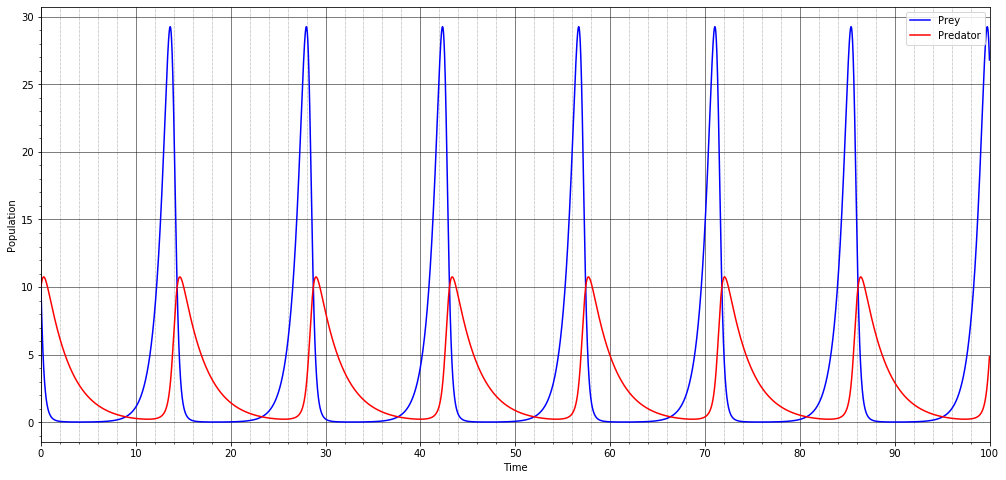

In [4]:
a=1.1
b=0.4
c=0.1
d=0.4

# a = 2.2
# b = 0.03 
# d = 1.4 
# c = 0.02

h=0.01 #0.00001 when i-1 is in place
t = np.arange(0, 100, h)

ye = np.zeros(len(t))
ye[0]=10
# ye[0]=150

yp = np.zeros(len(t))
yp[0]=10

for i in range(1,len(t)):        
    ye[i] = ye[i-1] + h*(a*ye[i-1] - b*ye[i-1]*yp[i-1])
    yp[i] = yp[i-1] + h*(c*ye[i]*yp[i-1] - d*yp[i-1])

# print(t)
# print(ye)
# print(yp)
fig, ax = plt.subplots(figsize=(17,8))

ax.plot(t, ye, color='blue', label="Prey")
ax.plot(t, yp, color='red', label="Predator")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

ax.set_xlim(xmin=0,xmax=100)
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()
# plt.savefig('Lotka–Volterra equations1.png')

# Lotka-Volterra model with two predators


$$\begin{alignedat}{0}
   \frac{dp}{dt} = ap - (b_1q_1+b_2q_2)p \\
   \\
   \frac{dq_1}{dt}=e_1b_1pq_1-m_1q_1 \\
   \\
   \frac{dq_2}{dt}=e_2b_2pq_2-m_2q_2 \\
\end{alignedat}$$

(0, 200)

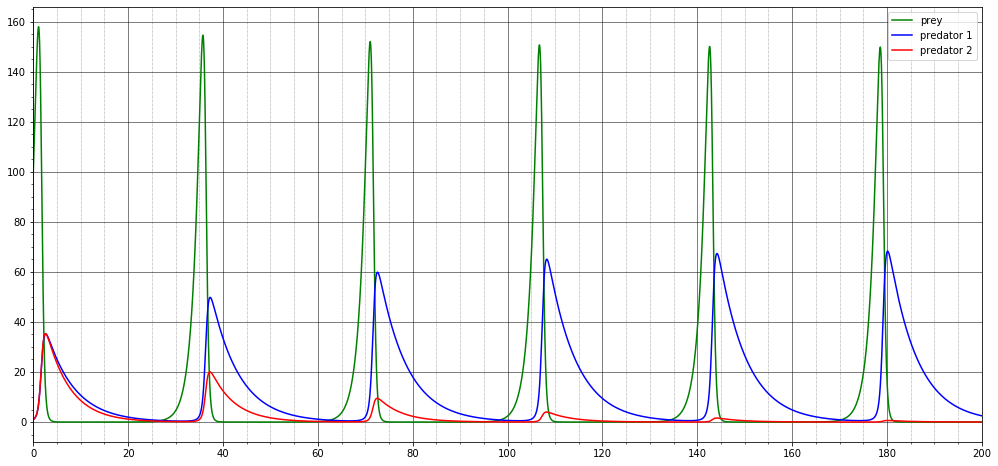

In [293]:
a = 0.7

b1 = 0.049
e1 = 0.3
m1 = 0.17

b2 = 0.05
e2 = 0.3
m2 = 0.2

h=0.01
t = np.arange(0, 200, h)

p = np.zeros(len(t))                
q1 = np.zeros(len(t))
q2 = np.zeros(len(t))

p[0] = 100
q1[0] = 1
q2[0] = 1
        
for i in range(1,len(t)):
    p[i] = p[i-1] + h*(a*p[i-1] - p[i-1]*(b1*q1[i-1] + b2*q2[i-1]))
    q1[i] = q1[i-1] + h*(e1*b1*p[i]*q1[i-1] - m1*q1[i-1])
    q2[i] = q2[i-1] + h*(e2*b2*p[i]*q2[i-1] - m2*q2[i-1])
        
    
fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, p, color='green', label="prey")
plt.plot(t, q1, color='blue', label="predator 1")
plt.plot(t, q2, color='red', label="predator 2")
plt.legend()

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
ax.set_xlim(xmin=0,xmax=200)

(0, 100)

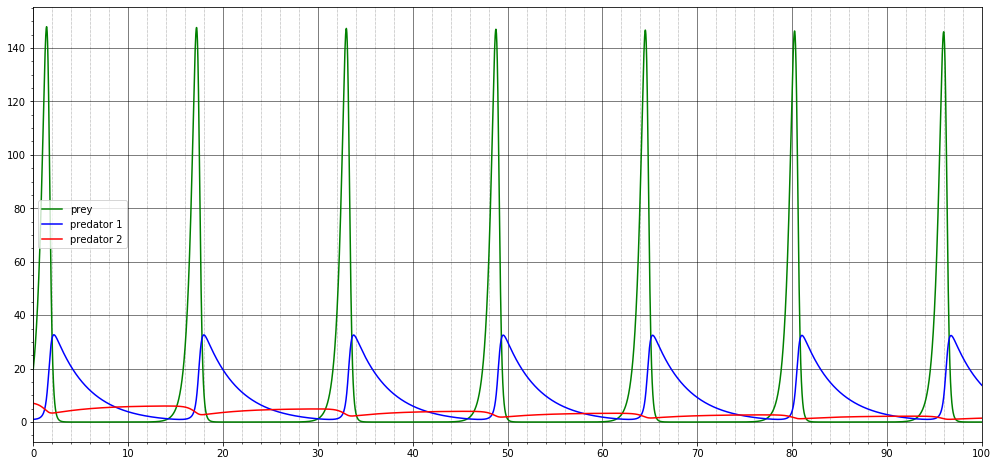

In [341]:
a = 2 #the growth rate of x
b = 0.00002 #related to the carrying capacity of x
c = 0.11 #the rate of change of the x due to the presence of y
d = 0.11 #the rate of change of x due to the presence of z

e = 0.28 #the natural death rate of y
f = 0.025 #the rate of change of y due to the presence of x

g = 0.001 #the natural death rate of z
j = 0.01 #related to the carrying capacity of z
k = 0.005 #the rate of change of z due to the presence of x
l = 0.005 #the rate of change of z due to the presence of y

h=0.01
t = np.arange(0, 100, h)

p = np.zeros(len(t))                
q1 = np.zeros(len(t))
q2 = np.zeros(len(t))

p[0] = 20
q1[0] = 1
q2[0] = 7
        
for i in range(1,len(t)):
    p[i] = p[i-1] + h*(a*p[i-1] - b*p[i-1]**2 - c*p[i-1]*q1[i-1] - d*p[i-1]*q1[i-1])
    q1[i] = q1[i-1] + h*(f*p[i]*q1[i-1] - e*q1[i-1])
    q2[i] = q2[i-1] + h*(k*p[i]*q2[i-1] + l*q1[i]*q2[i-1] - g*q2[i-1] - j*p[i]*q2[i-1])


fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, p, color='green', label="prey")
plt.plot(t, q1, color='blue', label="predator 1")
plt.plot(t, q2, color='red', label="predator 2")
plt.legend()

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(xmin=0,xmax=100)

# Vampire Apocalypse
    

$$\begin{alignedat}{0}
   \frac{dS}{dt} = p - bSV - dS - eS + fV \\
   \\
   \frac{dV}{dt} = bSV - aV + gR - eV - fV \\
   \\
   \frac{dR}{dt} = dS + aV - gR \\
   \\
   \frac{dI}{dt} = eS + eV
\end{alignedat}$$

(0, 10)

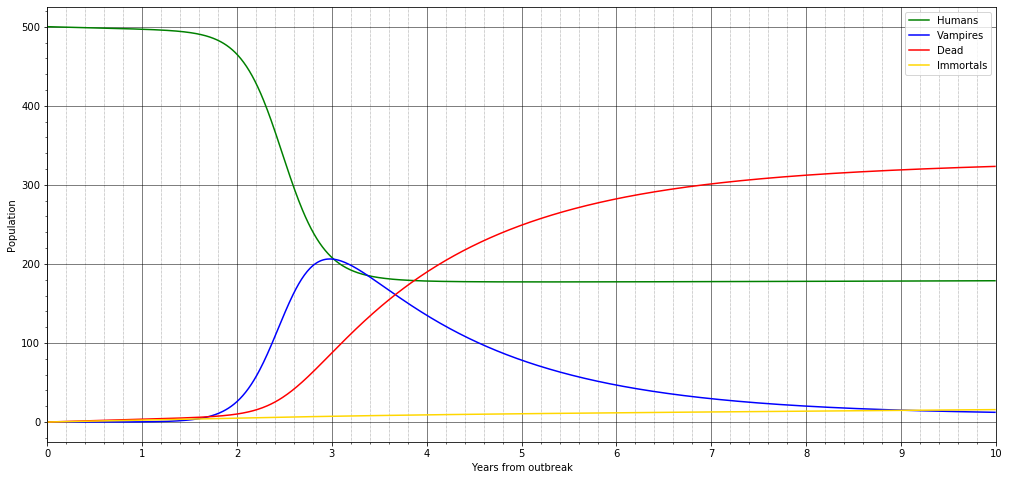

In [415]:
p = 3      # birth rate
d = 0.007  # natural death percent
b = 0.017  # chance of "vampire disease" be transmitted percent
g = 0.015  # resurect percent
a = 0.59  # destroy percent
e = 0.005 # chance of become an immortal percent
f = 3  # chance of become a human again percent

h=0.01
t = np.arange(0, 10, h)

ys = np.zeros(len(t))
ys[0]=500 # initial population
                 
yv = np.zeros(len(t))
yv[0]=0 # initial vampire population

yr = np.zeros(len(t))
yr[0]=0 # initial death population

yi = np.zeros(len(t))
yi[0]=0 # initial death population
        
for i in range(1,len(t)):
    ys[i] = ys[i-1] + h*(p - b*ys[i-1]*yv[i-1] - d*ys[i-1] - e*ys[i-1] + f*yv[i-1])
    yv[i] = yv[i-1] + h*(b*ys[i-1]*yv[i-1] - a*yv[i-1] + g*yr[i-1] - e*yv[i-1] - f*yv[i-1])
    yr[i] = yr[i-1] + h*(d*ys[i-1] + a*yv[i-1] - g*yr[i-1])
    yi[i] = yi[i-1] + h*(e*ys[i-1] + e*yv[i-1])
    
    
fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, ys, color='green', label="Humans")
plt.plot(t, yv, color='blue', label="Vampires")
plt.plot(t, yr, color='red', label="Dead")
plt.plot(t, yi, color='gold', label="Immortals")
plt.legend()
plt.xlabel('Years from outbreak')
plt.ylabel('Population')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)

# SIR model (Susceptible, Infectious, Recovered)


$$\begin{alignedat}{0}
   \frac{dS}{dt} = - \beta I S \\
   \\
   \frac{dI}{dt} = \beta I S- \gamma I \\
   \\
   \frac{dR}{dt} = \gamma I
\end{alignedat}$$

(0, 720)

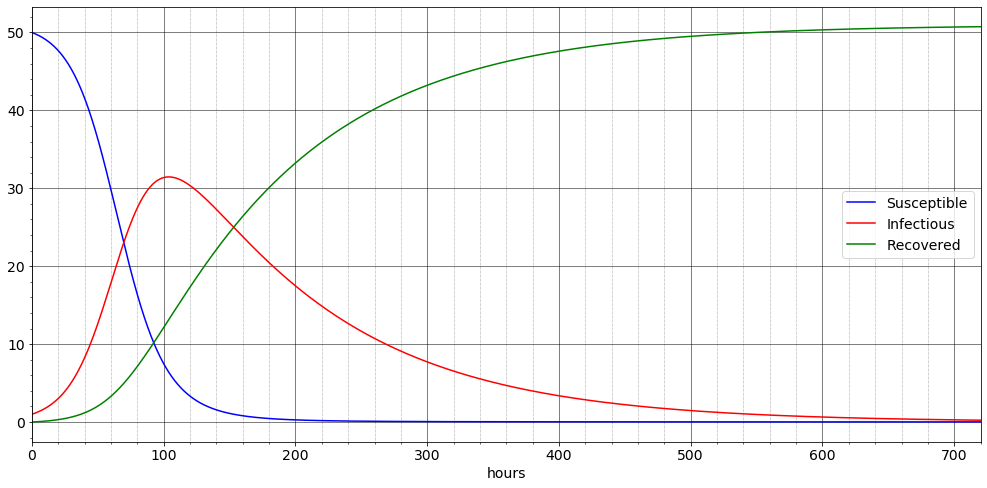

In [519]:
beta = 10/(40*8*24)
# 40 susceptibles, 8 infected, while the numbers were 30 and 18, respectively, 24 hours later
# beta = 10/(40*8*24)

gamma = 3/(15*24)
# Among 15 infected, it was observed that 3 recovered during a day 
# gamma=3/(15*24)

h=0.1
days=30
N_t = int(days*24/h)
t = np.arange(0, N_t*h, h)
ys = np.zeros(len(t))
ys[0]=50

yi = np.zeros(len(t))
yi[0]=1

yr = np.zeros(len(t))
yr[0]=0

for i in range(1,len(t)):
    ys[i]=ys[i-1]-h*(beta*ys[i-1]*yi[i-1])
    yi[i]=yi[i-1]+h*(beta*ys[i-1]*yi[i-1])-h*(gamma*yi[i-1])
    yr[i]=yr[i-1]+h*(gamma*yi[i-1])
    

fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, ys, color='blue', label="Susceptible")
plt.plot(t, yi, color='red', label="Infectious")
plt.plot(t, yr, color='green', label="Recovered")
plt.legend()
plt.xlabel('hours')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xlim(xmin=0,xmax=720)

# Time-restricted immunity

$$\begin{alignedat}{0}
   \frac{dS}{dt} = - \beta I S+\nu R \\
   \\
   \frac{dI}{dt} = \beta I S- \gamma I \\
   \\
   \frac{dR}{dt} = \gamma I-\nu R
\end{alignedat}$$

(0, 4800)

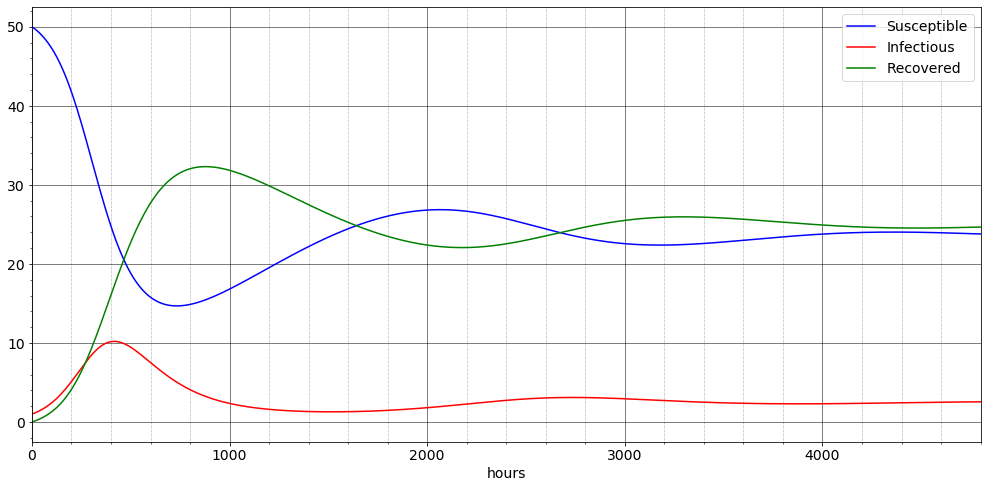

In [524]:
beta = 0.000352
gamma = 0.0083
nu=1/(50*24) # how long the immunity is present 300 days

h=0.1
days=200
N_t = int(days*24/h)
t = np.arange(0, N_t*h, h)
ys = np.zeros(len(t))
ys[0]=50

yi = np.zeros(len(t))
yi[0]=1

yr = np.zeros(len(t))
yr[0]=0

for i in range(1,len(t)):
    ys[i]=ys[i-1]-h*(beta*ys[i-1]*yi[i-1])+h*(nu*yr[i-1])
    yi[i]=yi[i-1]+h*(beta*ys[i-1]*yi[i-1])-h*(gamma*yi[i-1])
    yr[i]=yr[i-1]+h*(gamma*yi[i-1])-h*(nu*yr[i-1])
    

fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, ys, color='blue', label="Susceptible")
plt.plot(t, yi, color='red', label="Infectious")
plt.plot(t, yr, color='green', label="Recovered")
plt.legend()
plt.xlabel('hours')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1000))
ax.set_xlim(xmin=0,xmax=4800)

# Vaccination

$$\begin{alignedat}{0}
   \frac{dS}{dt} = - \beta I S+\nu R-pS \\
   \\
   \frac{dV}{dt} = pS \\
   \\
   \frac{dI}{dt} = \beta I S- \gamma I \\
   \\
   \frac{dR}{dt} = \gamma I-\nu R
\end{alignedat}$$

(0, 4800)

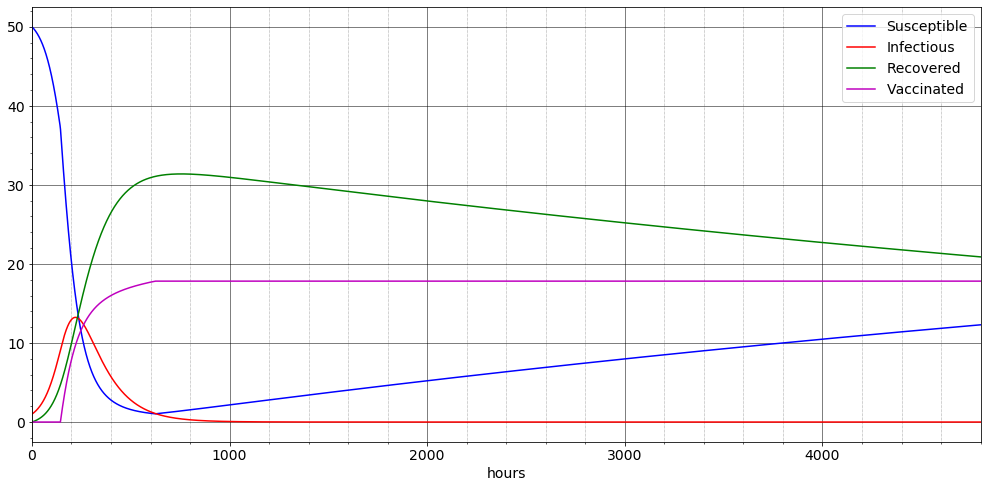

In [554]:
beta = 0.00052
gamma = 0.0083
nu=1/(400*24)

h=0.1
days=200
N_t = int(days*24/h)
t = np.arange(0, N_t*h, h)
ys = np.zeros(len(t))
ys[0]=50

yi = np.zeros(len(t))
yi[0]=1

yr = np.zeros(len(t))
yr[0]=0

yv = np.zeros(len(t))
yv[0]=0

p = zeros(N_t+1)
start_index = int(6*24/h)
stop_index = int(26*24/h)
p[start_index:stop_index] = 0.005

for i in range(1,len(t)):
    ys[i]=ys[i-1]-h*(beta*ys[i-1]*yi[i-1])+h*(nu*yr[i-1])-h*(p[i]*ys[i-1])
    yv[i]=yv[i-1]+h*(p[i]*ys[i-1])
    yi[i]=yi[i-1]+h*(beta*ys[i-1]*yi[i-1])-h*(gamma*yi[i-1])
    yr[i]=yr[i-1]+h*(gamma*yi[i-1])-h*(nu*yr[i-1])
    

fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, ys, color='blue', label="Susceptible")
plt.plot(t, yi, color='red', label="Infectious")
plt.plot(t, yr, color='green', label="Recovered")
plt.plot(t, yv, color='m', label="Vaccinated")
plt.legend()
plt.xlabel('hours')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1000))
ax.set_xlim(xmin=0,xmax=4800)

$$\begin{alignedat}{0}
   \frac{dS}{dt} = - \beta I S+\nu R-pS+\pi V \\
   \\
   \frac{dV}{dt} = pS - \pi V \\
   \\
   \frac{dI}{dt} = \beta I S- \gamma I \\
   \\
   \frac{dR}{dt} = \gamma I-\nu R
\end{alignedat}$$

(0, 4800)

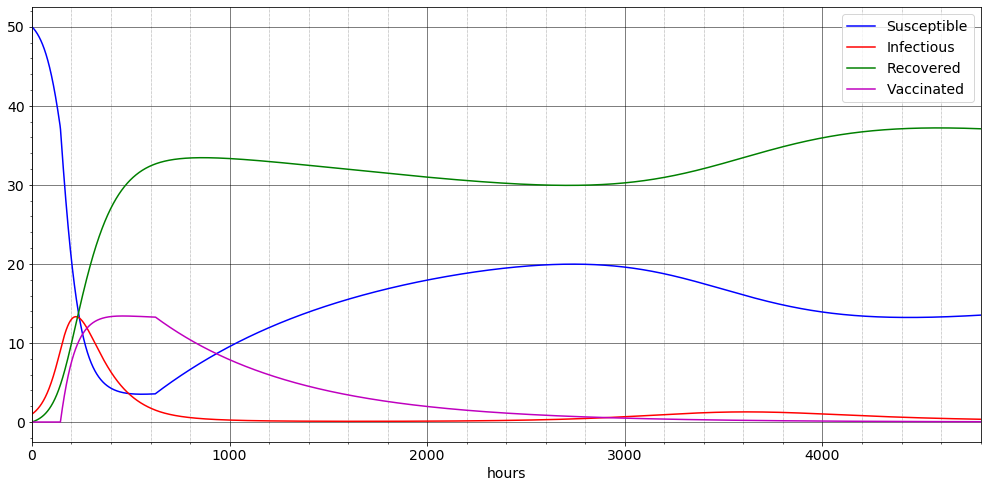

In [567]:
beta = 0.00052
gamma = 0.0083
nu=1/(400*24)

h=0.1
days=200
N_t = int(days*24/h)
t = np.arange(0, N_t*h, h)
ys = np.zeros(len(t))
ys[0]=50

yi = np.zeros(len(t))
yi[0]=1

yr = np.zeros(len(t))
yr[0]=0

yv = np.zeros(len(t))
yv[0]=0

p = zeros(N_t+1)
start_index = int(6*24/h)
stop_index = int(26*24/h)
p[start_index:stop_index] = 0.005

pi = 1/(30*24)

for i in range(1,len(t)):
    ys[i]=ys[i-1]-h*(beta*ys[i-1]*yi[i-1])+h*(nu*yr[i-1])-h*(p[i]*ys[i-1])+ h*(pi*yv[i-1])
    yv[i]=yv[i-1]+h*(p[i]*ys[i-1])-h*(pi*yv[i-1])
    yi[i]=yi[i-1]+h*(beta*ys[i-1]*yi[i-1])-h*(gamma*yi[i-1])
    yr[i]=yr[i-1]+h*(gamma*yi[i-1])-h*(nu*yr[i-1])
    

fig, ax = plt.subplots(figsize=(17,8))
plt.plot(t, ys, color='blue', label="Susceptible")
plt.plot(t, yi, color='red', label="Infectious")
plt.plot(t, yr, color='green', label="Recovered")
plt.plot(t, yv, color='m', label="Vaccinated")
plt.legend()
plt.xlabel('hours')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1000))
ax.set_xlim(xmin=0,xmax=4800)

#  Trajectory of a rocket

$$\begin{alignedat}{0}
   h' = V
   \\
   V' = -g - \frac{1}{2}\rho V|V|\frac{C_D A}{m}
\end{alignedat}$$

(-20, 30)

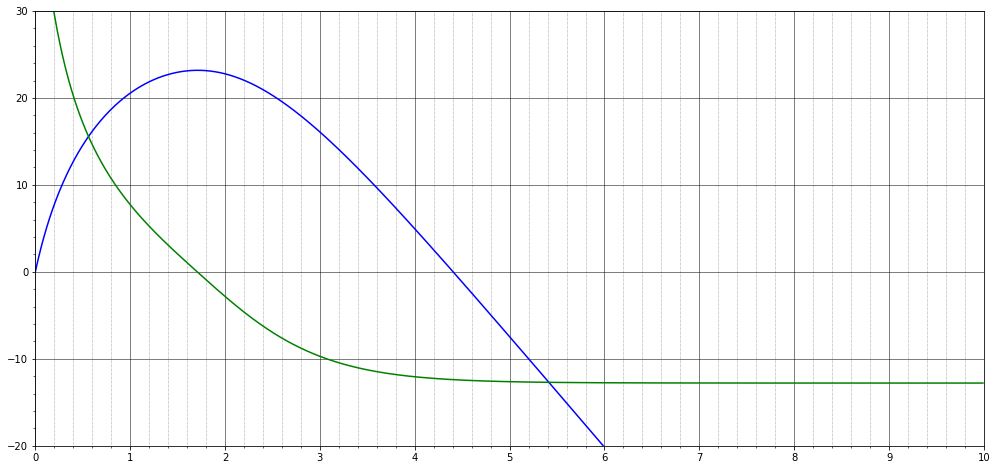

In [64]:
g = 9.81
rho = 1.2
cd = 0.1 #CD vary from 0.1 for a well streamlined body, to 1.0 or more for an unstreamlined or bluff body.
a = 1
m = 1

h=0.01
t = np.arange(0, 10, h)

u = np.zeros(len(t))
u[0]=0

v = np.zeros(len(t))
v[0]=50

for i in range(1,len(t)):            
    u[i] = u[i-1] + h*(v[i-1])
    v[i] = v[i-1] + h*(-g-0.5*rho*v[i-1]*abs(v[i-1])*((cd*a)/m))
    

fig, ax = plt.subplots(figsize=(17,8))

ax.plot(t, u, color='blue')
ax.plot(t, v, color='green')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)
ax.set_ylim(ymin=-20,ymax=30)

(0, 30)

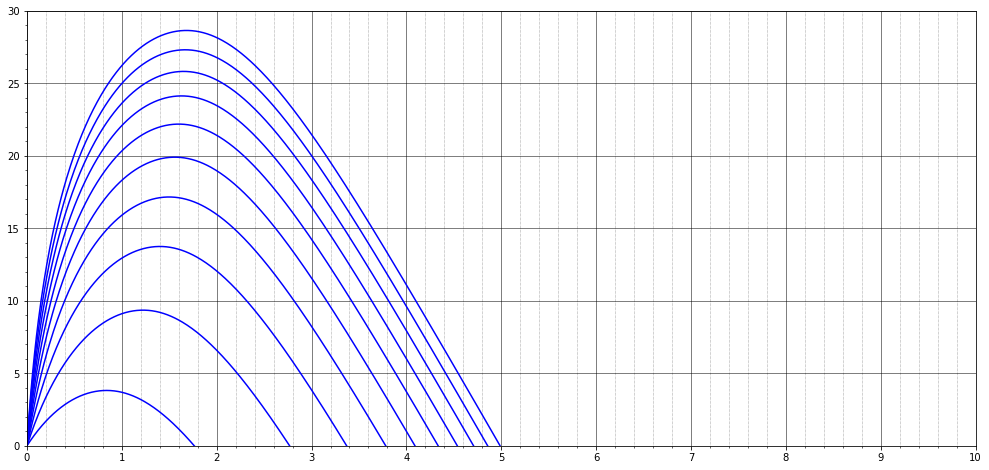

In [61]:
def trajectory(u, v):
    u_dot = v
    v_dot = -g-0.5*rho*v*abs(v)*((cd*a)/m)
    return u_dot, v_dot

g = 9.81
rho = 1.2
cd = 0.5
a = 1
m = 4

v0=[10,20,30,40,50,60,70,80,90,100]

h=0.01
t = np.arange(0, 10, h)

fig, ax = plt.subplots(figsize=(17,8))

for n, k in enumerate(v0):
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    
    u[0]=0    
    v[0]=k

    for i in range(len(t)-1):            
        u_dot, v_dot = trajectory(u[i], v[i])
        u[i+1] = u[i] + (u_dot * h)
        v[i+1] = v[i] + (v_dot * h)
    
    ax.plot(t, u, color='blue')
#     ax.plot(t, v, color='green')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)
ax.set_ylim(ymin=0,ymax=30)

$$\begin{alignedat}{0}
   h' = V
   \\
   V' = -g - \frac{1}{2}\rho V|V|\frac{C_D A}{m}+\frac{V m_{fuel}'u_e}{|V|m}
   \\
   m' = -m_{fuel}'
\end{alignedat}$$

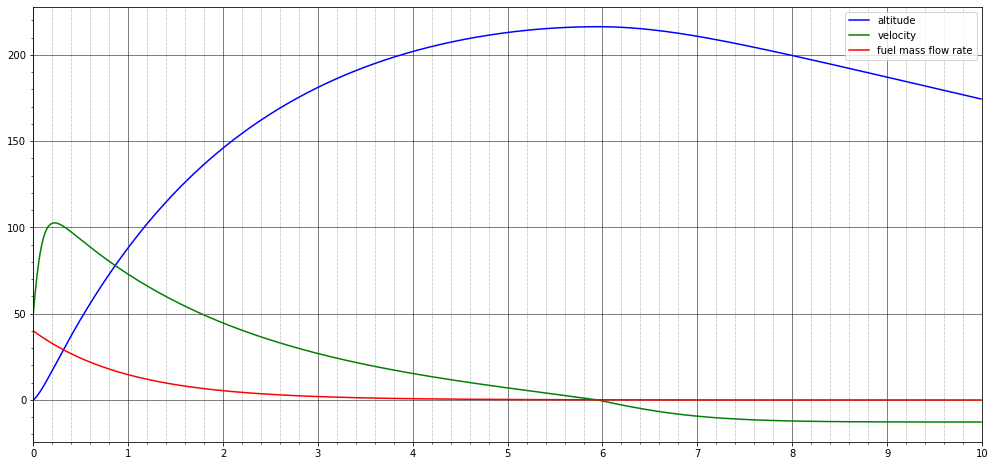

In [93]:
g = 9.81 #gravitational acceleration
rho = 1.2 #air density
cd = 0.1 #drag coefficient between 0.1 and 1.0
a = 1 #drag reference area
m = 1 #mass
ue = 20 #exhaust velocity

h=0.01
t = np.arange(0, 10, h)

u = np.zeros(len(t))
u[0]=0

v = np.zeros(len(t))
v[0]=50

mf = np.zeros(len(t))
mf[0]=40

for i in range(1,len(t)):            
    u[i] = u[i-1] + h*(v[i-1])
    v[i] = v[i-1] + h*(-g-0.5*rho*v[i-1]*abs(v[i-1])*((cd*a)/m)+(v[i-1]*mf[i-1]*ue)/(abs(v[i-1])*m))
    mf[i] = mf[i-1] - h*(mf[i-1])
    

fig, ax = plt.subplots(figsize=(17,8))

ax.plot(t, u, color='blue', label="altitude")
ax.plot(t, v, color='green', label="velocity")
ax.plot(t, mf, color='red', label="fuel mass flow rate")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)
# ax.set_ylim(ymin=-20,ymax=30)
plt.legend()

# Newton's Law of Cooling

$$\frac{dT}{dt} = -k(T(t)-T_a)+T_{in}$$

(0, 10)

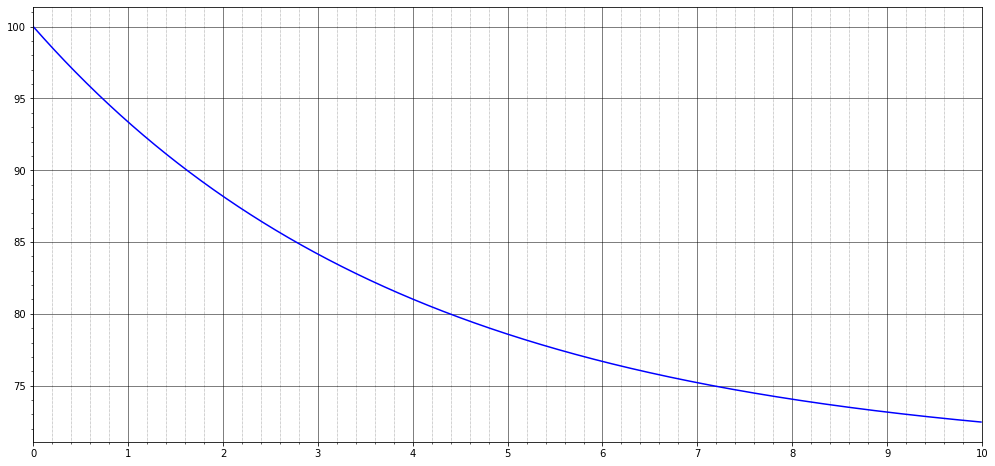

In [5]:
k = 0.25 # Temperature changing coefficient
t_a = -10 # Temperature of surroundings
t_in = 20 # Temperature being transfer to the system 

h=0.01
t = np.arange(0, 10, h)

y = np.zeros(len(t))
y[0]=100


for i in range(1,len(t)):            
    y[i] = y[i-1] + h*(-k*(y[i-1]-t_a)+t_in)
    

fig, ax = plt.subplots(figsize=(17,8))

ax.plot(t, y, color='blue')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)

$$\begin{alignedat}{0}
   \frac{dT_{Basement}}{dt} = k_0(T_{Earth}-T_{Basement})+k_1(T_{Main\;floor}-T_{Basement})\\
   \\
   \frac{dT_{Main\;floor}}{dt} = k_1(T_{Basement}-T_{Main\;floor})+k_2(T_{Surroundings}-T_{Main\;floor})+k_3(T_{Attic}-T_{Main\;floor})+T_{Heater}\\
   \\
   \frac{dT_{Attic}}{dt} = k_3(T_{Main\;floor}-T_{Attic})+k_4(T_{Surroundings}-T_{Attic})\\
\end{alignedat}$$

![](http://www.sharetechnote.com/image/EngMath_DifferentialEq_Ex_Cooling_3_01.png)


| Material | Thermal conductivity $\left (\frac{W}{m·K} \right )$ |
|------|------|
| Brick | 0.62 - 0.84 |
| Concrete | 0.16 - 1.4 |
| Glass (window) | 0.8 - 1.5 |
| Paper | 0.04 |
| Expanded polystyrene | 0.033 |
| Water | 0.61 |
| Snow | 0.05 - 0.25 |
| Air | 0.026 |
| Stone (limestone) | 1.30 |
| Stone (sandstone) | 1.50 |
| Stone (granite) | 1.7 - 4.0 |
| Wood | 0.12 - 0.16 |
| Sand | 0.58 - 1.94 |
| Clay | 0.36 - 0.69 |
| Copper | 400 |
| Natural diamond | 1500 |

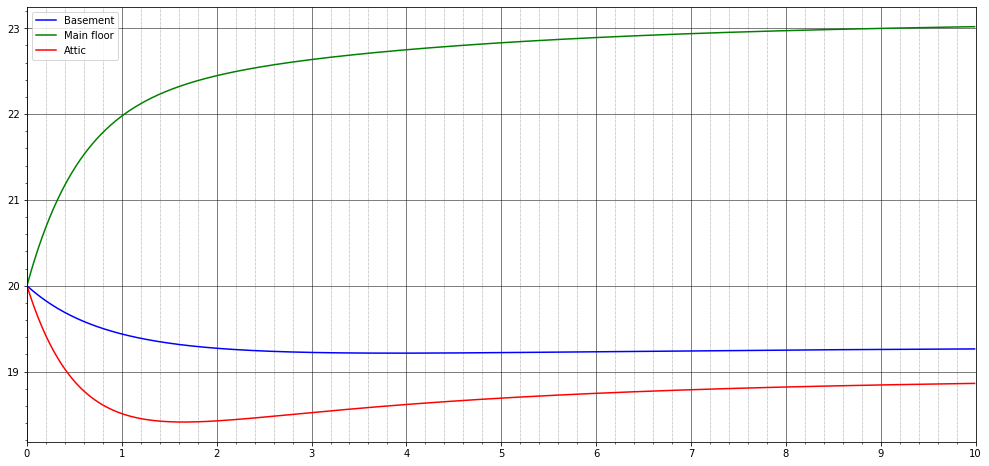

In [106]:
k0 = 0.6
k1 = 0.15
k2 = 0.1
k3 = 0.75
k4 = 0.35

t_e = 10
t_s = 10
t_h = 5

h=0.01
t = np.arange(0, 10, h)

y_a = np.zeros(len(t))
y_m = np.zeros(len(t))
y_b = np.zeros(len(t))

y_a[0]=20
y_m[0]=20
y_b[0]=20


for i in range(1,len(t)):            
    y_b[i] = y_b[i-1] + h*(k0*(t_e - y_b[i-1]) + k1*(y_m[i-1] - y_b[i-1]) + t_h)
    y_m[i] = y_m[i-1] + h*(k1*(y_b[i-1] - y_m[i-1]) + k2*(t_s - y_m[i-1]) + k3*(y_a[i-1] - y_m[i-1]) + t_h)
    y_a[i] = y_a[i-1] + h*(k3*(y_m[i-1] - y_a[i-1]) + k4*(t_s - y_a[i-1]))
    
fig, ax = plt.subplots(figsize=(17,8))

ax.plot(t, y_b, color='blue', label="Basement")
ax.plot(t, y_m, color='green', label="Main floor")
ax.plot(t, y_a, color='red', label="Attic")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(xmin=0,xmax=10)
plt.legend()